# Project Report

### Problem Setting

### Problem Definition

### Data Sources

We will be using the dataset provided by Google for their New York City Taxi Fare Prediction challenge.
Link : https://www.kaggle.com/c/new-york-city-taxi-fare-prediction

### Data Description

### Importing the libraries

In [50]:
import pandas as pd # Pandas is used for data manipulation
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.metrics.pairwise import haversine_distances
%matplotlib inline
import plotly.express as px
import folium
from folium import FeatureGroup, LayerControl, Map, Marker
from folium.plugins import HeatMap
from folium.plugins import TimestampedGeoJson
from folium.plugins import MarkerCluster

plt.style.use('seaborn-whitegrid')

In [51]:
nyc = pd.read_csv('train.csv', nrows = 50000,parse_dates=["pickup_datetime"])

# Let's see data of first few rows of the dataset
nyc.head(10)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45+00:00,-74.000964,40.731630,-73.972892,40.758233,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00+00:00,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00+00:00,-73.951300,40.774138,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00+00:00,-74.006462,40.726713,-73.993078,40.731628,1
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00+00:00,-73.980658,40.733873,-73.991540,40.758138,2


## Data Exploration

### Dataset using : nyc.csv

#### Checking the datatypes of the features of the dataset

In [52]:
nyc.dtypes

key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

#### Checking the statistics of the data

In [53]:
nyc.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734371,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


### From the statistical summary we can conclude these points :
- The fare amount has a minimum value of -44.9, which cannot be true. The base fare for New York City nyc is \\$2.50.So, We will be removing records where the fare is less than \\$2.50.
- The minimum value of passenger count is zero. This is not possible.

In [54]:
nyc = nyc[nyc['fare_amount']>2.50]

In [55]:
nyc = nyc[nyc['passenger_count']>0]

In [56]:
nyc.shape

(49623, 8)

In [57]:
#Now checking for missing data
nyc.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

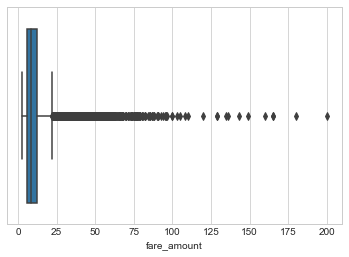

In [58]:
sns.boxplot(nyc['fare_amount'])

From the boxplot we can see that there are a lot of outliers. We will be removing them in the below steps.

In [59]:
# Calculating the mean and the standard deviation of the 'fare_amount' in the dataset.
mean_df = np.mean(nyc.fare_amount)
std_df = np.std(nyc.fare_amount)
# Filtering the rows of from outliers
nyc = nyc[(nyc.fare_amount > (mean_df - 3*std_df)) & (nyc.fare_amount < (mean_df + 3*std_df))]
nyc.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [60]:
nyc.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,48262.000000,48262.000000,48262.000000,48262.000000,48262.000000,48262.000000
mean,10.231802,-72.550054,39.957450,-72.555920,39.956285,1.672434
std,6.422572,10.257702,6.142819,10.229466,5.899574,1.287390
min,2.900000,-75.423848,-74.006893,-84.654241,-74.001000,1.000000
25%,6.000000,-73.992220,40.735749,-73.991173,40.735205,1.000000
50%,8.300000,-73.982035,40.753030,-73.980224,40.753731,1.000000
75%,12.100000,-73.968037,40.767502,-73.964404,40.768311,2.000000
max,40.330000,40.783472,401.083332,40.851027,43.415190,6.000000


### Location Data
New York city coordinates are (https://www.travelmath.com/cities/New+York,+NY):

- longitude = -74.0063889
- lattitude = 40.7141667

We will be deleting all records where these doesn't match up.

In [61]:
nyc = nyc[((nyc['pickup_longitude'] > -78) 
             & (nyc['pickup_longitude'] < -70)) 
            & ((nyc['dropoff_longitude'] > -78) 
               & (nyc['dropoff_longitude'] < -70)) 
            & ((nyc['pickup_latitude'] > 37) 
               & (nyc['pickup_latitude'] < 45)) 
            & ((nyc['dropoff_latitude'] > 37) 
               & (nyc['dropoff_latitude'] < 45))]

In [62]:
nyc.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,47306.000000,47306.000000,47306.000000,47306.000000,47306.000000,47306.000000
mean,10.230491,-73.977655,40.752024,-73.975372,40.752468,1.674016
std,6.420295,0.034469,0.035131,0.034108,0.036601,1.288818
min,2.900000,-75.423848,39.603178,-75.354559,39.604972,1.000000
25%,6.000000,-73.992435,40.737203,-73.991350,40.736782,1.000000
50%,8.400000,-73.982264,40.753721,-73.980626,40.754436,1.000000
75%,12.100000,-73.969219,40.767897,-73.966033,40.768683,2.000000
max,40.330000,-72.856968,43.098708,-72.854940,43.415190,6.000000


In [63]:
nyc.shape

(47306, 8)

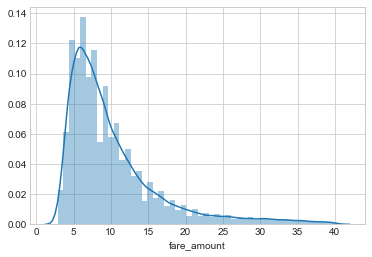

In [64]:
sns.distplot(nyc.fare_amount)

In [65]:
nyc_test = pd.read_csv('test.csv')

In [66]:
nyc_test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [67]:
nyc_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [68]:
nyc_test.shape

(9914, 7)

#### Calculating the distance

In [69]:
#To calculate the distance in miles we use a formula called "HAVERSINE FORMULA"

def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

In [70]:
#We add a new distance column and from the diagram we can understand that all rides are short distance

nyc['distance'] = distance(nyc.pickup_latitude, nyc.pickup_longitude, \
                                      nyc.dropoff_latitude, nyc.dropoff_longitude)
nyc.distance.describe()

count    47306.000000
mean         1.875354
std          2.141546
min          0.000000
25%          0.781316
50%          1.313638
75%          2.325527
max         80.747487
Name: distance, dtype: float64

#### Adding Year, Month and Day and time as a separate column

In [71]:
nyc['year'] = nyc.pickup_datetime.apply(lambda x : x.year)
nyc['month'] = nyc.pickup_datetime.apply(lambda x : x.month)
nyc['day'] = nyc.pickup_datetime.apply(lambda x : x.day)
nyc['time'] = nyc.pickup_datetime.apply(lambda x : x.time)
nyc['hour'] = nyc.time.apply(lambda x : x.hour)
nyc['minutes'] = nyc.time.apply(lambda x : x.minute)
nyc.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,year,month,day,time,hour,minutes
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.640487,2009,6,15,17:26:21,17,26
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5.250670,2010,1,5,16:52:16,16,52
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.863411,2011,8,18,00:35:00,0,35
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,1.739386,2012,4,21,04:30:42,4,30
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.242218,2010,3,9,07:51:00,7,51


## Exploratory Data Analysis

Text(0.5, 1.0, 'Count of Passengers')

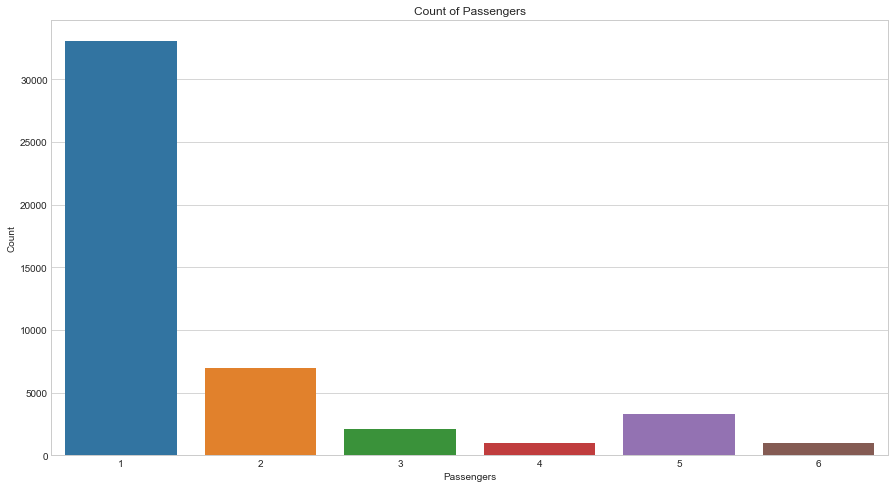

In [72]:
pass_count = nyc.groupby('passenger_count').count()
plt.subplots(figsize=(15,8))
sns.barplot(pass_count.index,pass_count.key)
plt.xlabel('Passengers')
plt.ylabel('Count')
plt.title('Count of Passengers')


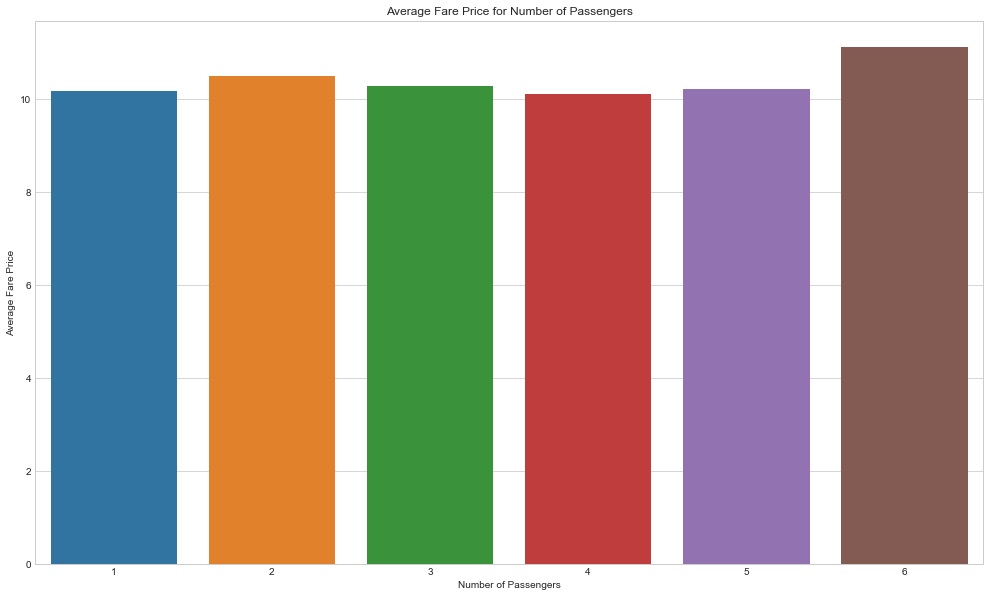

In [73]:
passenger_fare = nyc.groupby(['passenger_count']).mean()

fig, ax = plt.subplots(figsize=(17,10))

sns.barplot(passenger_fare.index, passenger_fare['fare_amount'])
plt.xlabel('Number of Passengers')
plt.ylabel('Average Fare Price')
plt.title('Average Fare Price for Number of Passengers')
plt.show()

In [74]:
print("Average ride cost in USD/Mile : {}".format(nyc.fare_amount.sum()/nyc["distance"].sum()))

Average ride cost in USD/Mile : 5.455230347593375


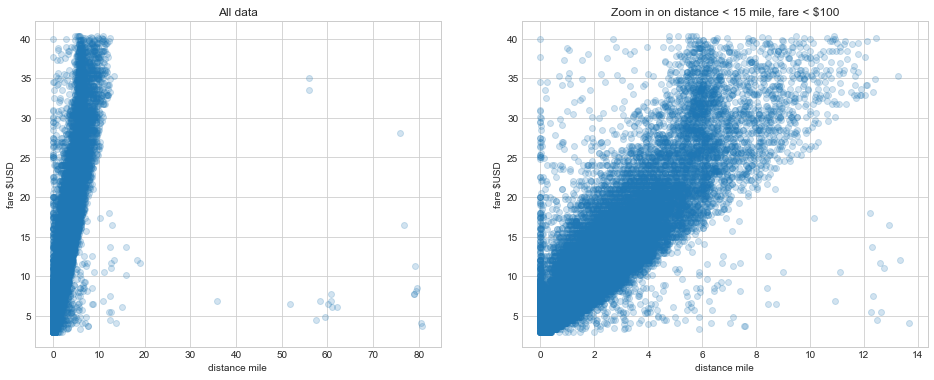

In [75]:
#Scatterplot of distance-Fare

fig, axs = plt.subplots(1, 2, figsize=(16,6))
axs[0].scatter(nyc.distance, nyc.fare_amount, alpha=0.2)
axs[0].set_xlabel('distance mile')
axs[0].set_ylabel('fare $USD')
axs[0].set_title('All data')

# zoom in on part of data
idx = (nyc.distance < 15) 
axs[1].scatter(nyc[idx].distance, nyc[idx].fare_amount, alpha=0.2)
axs[1].set_xlabel('distance mile')
axs[1].set_ylabel('fare $USD')
axs[1].set_title('Zoom in on distance < 15 mile, fare < $100');

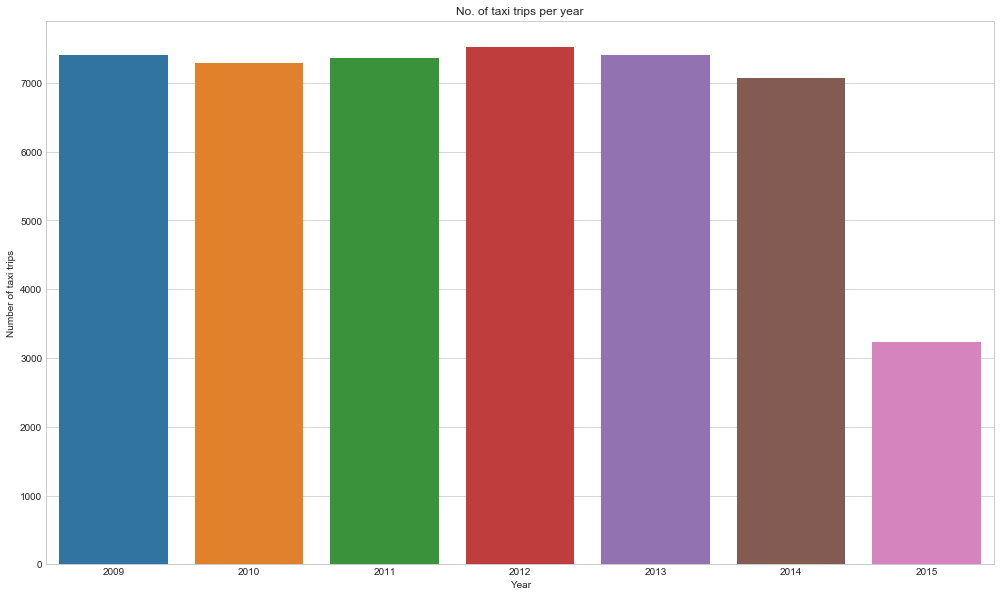

In [76]:
fig, ax = plt.subplots(figsize=(17,10))
year_count = nyc.groupby('year').count()
sns.barplot(year_count.index,year_count.key)
plt.xlabel('Year')
plt.ylabel('Number of taxi trips')
plt.title('No. of taxi trips per year')
plt.show()

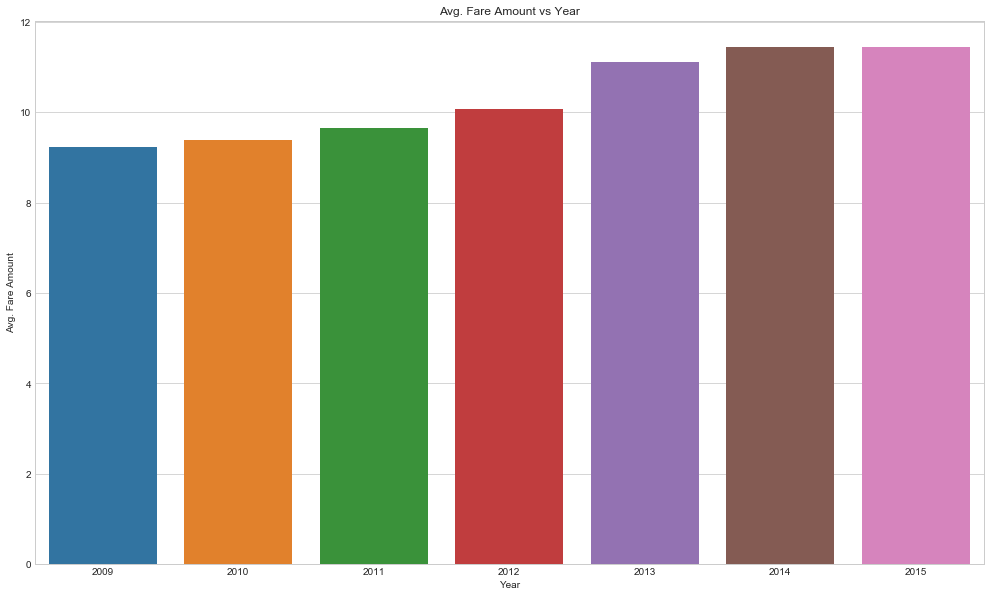

In [77]:
fig, ax = plt.subplots(figsize=(17,10))
avg_fare_years = nyc.groupby('year').mean()
avg_fare_years.head()
sns.barplot(avg_fare_years.index,avg_fare_years.fare_amount)
plt.xlabel('Year')
plt.ylabel('Avg. Fare Amount')
plt.title('Avg. Fare Amount vs Year')
plt.show()

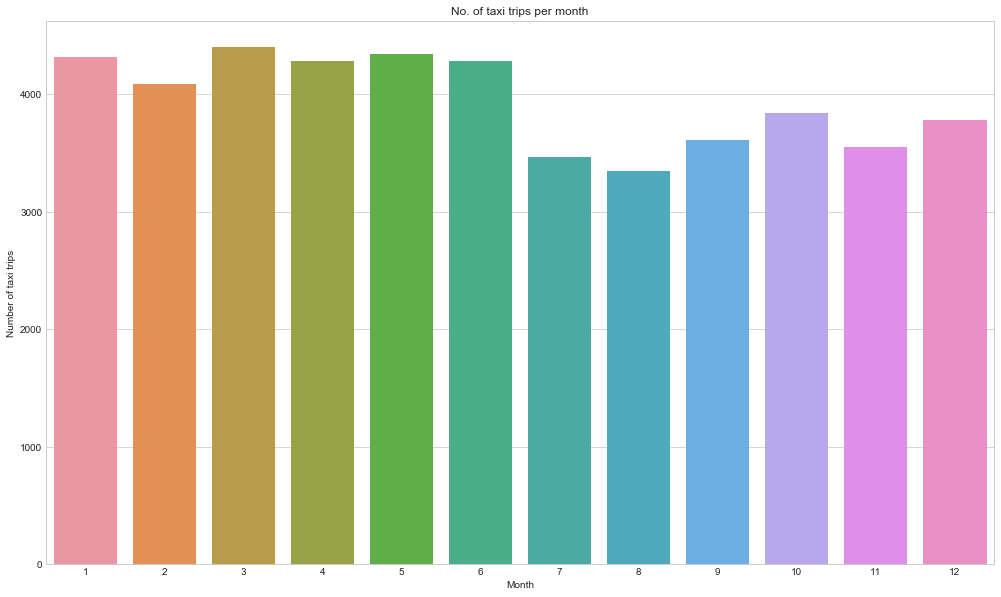

In [78]:
fig, ax = plt.subplots(figsize=(17,10))
month_count = nyc.groupby('month').count()
sns.barplot(month_count.index,month_count.key)
plt.xlabel('Month')
plt.ylabel('Number of taxi trips')
plt.title('No. of taxi trips per month')
plt.show()

### Plot Heatmap of Pickups and Dropoffs within NYC


/Users/ashwinjohnchempolil/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:420: FutureWarning:

Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.



(-74.03, -73.75)

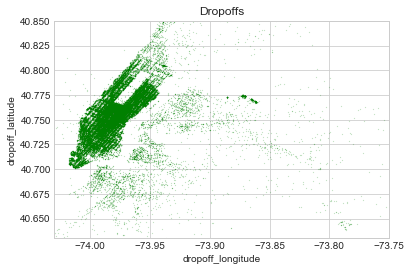

In [79]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
nyc.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude',
                color='green', 
                s=.02, alpha=.6)
plt.title("Dropoffs")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

(-74.03, -73.75)

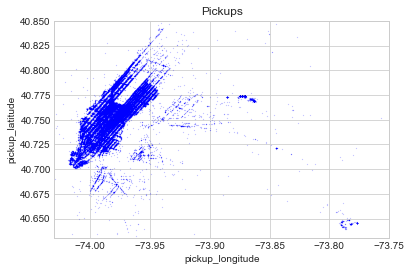

In [80]:
nyc.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',
                color='blue', 
                s=.02, alpha=.6)
plt.title("Pickups")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

### Correlation Plot

In [81]:
#sns.pairplot(nyc)
#sns.plt.show()

New York city is divided into 7 Boroughs. Let us calculate which borough pickup and dropoff points are. And whether that effects the fare

In [82]:
nyc_boroughs={
    'manhattan':{
        'min_lng':-74.0479,
        'min_lat':40.6829,
        'max_lng':-73.9067,
        'max_lat':40.8820
    },
    
    'queens':{
        'min_lng':-73.9630,
        'min_lat':40.5431,
        'max_lng':-73.7004,
        'max_lat':40.8007

    },

    'brooklyn':{
        'min_lng':-74.0421,
        'min_lat':40.5707,
        'max_lng':-73.8334,
        'max_lat':40.7395

    },

    'bronx':{
        'min_lng':-73.9339,
        'min_lat':40.7855,
        'max_lng':-73.7654,
        'max_lat':40.9176

    },

    'staten_island':{
        'min_lng':-74.2558,
        'min_lat':40.4960,
        'max_lng':-74.0522,
        'max_lat':40.6490

    }
    
    
    
}



In [83]:
def getBorough(lat,lng):
    
    locs=nyc_boroughs.keys()
    for loc in locs:
        if lat>=nyc_boroughs[loc]['min_lat'] and lat<=nyc_boroughs[loc]['max_lat'] and lng>=nyc_boroughs[loc]['min_lng'] and lng<=nyc_boroughs[loc]['max_lng']:
            return loc
    return 'others'

In [84]:
nyc['pickup_borough']=nyc.apply(lambda row:getBorough(row['pickup_latitude'],row['pickup_longitude']),axis=1)
nyc['dropoff_borough']=nyc.apply(lambda row:getBorough(row['dropoff_latitude'],row['dropoff_longitude']),axis=1)

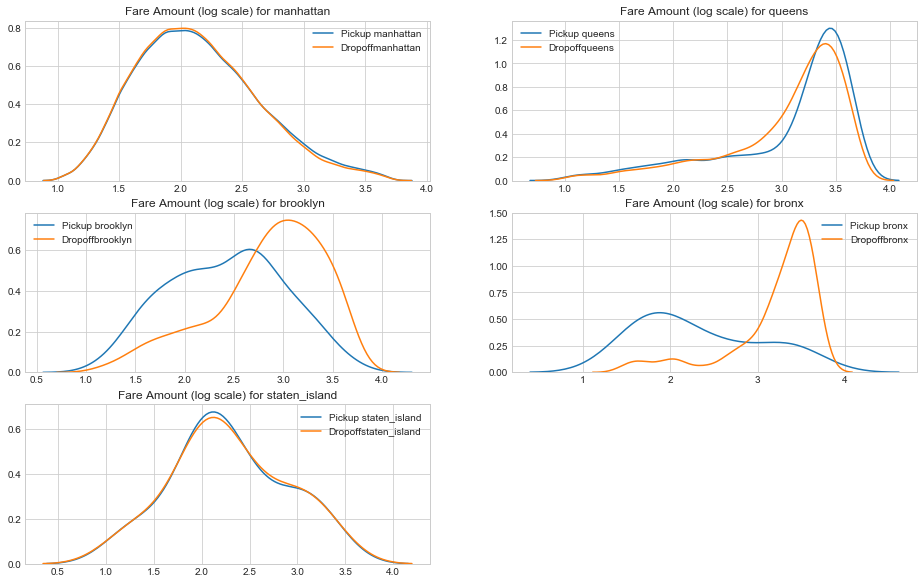

In [85]:
plt.figure(figsize=(16,10))
plt.title("Distribution of Fare Amount Across Buroughs")
i=1
for key in nyc_boroughs.keys():
    plt.subplot(3,2,i)
    sns.kdeplot(np.log(nyc.loc[nyc['pickup_borough']==key,'fare_amount'].values),label='Pickup '+ key)
    sns.kdeplot(np.log(nyc.loc[nyc['dropoff_borough']==key,'fare_amount'].values),label='Dropoff'+ key).set_title("Fare Amount (log scale) for "+key)
    
    i=i+1

There is a significant difference in pickups and dropoffs fare amount for each burough except Manhattan. We can see pickups from Queens is expensive compared to pickups from other Buroughs.Very high difference in pickup and dropoff prices for Staten Island.

/Users/ashwinjohnchempolil/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning:

divide by zero encountered in log

/Users/ashwinjohnchempolil/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning:

divide by zero encountered in log



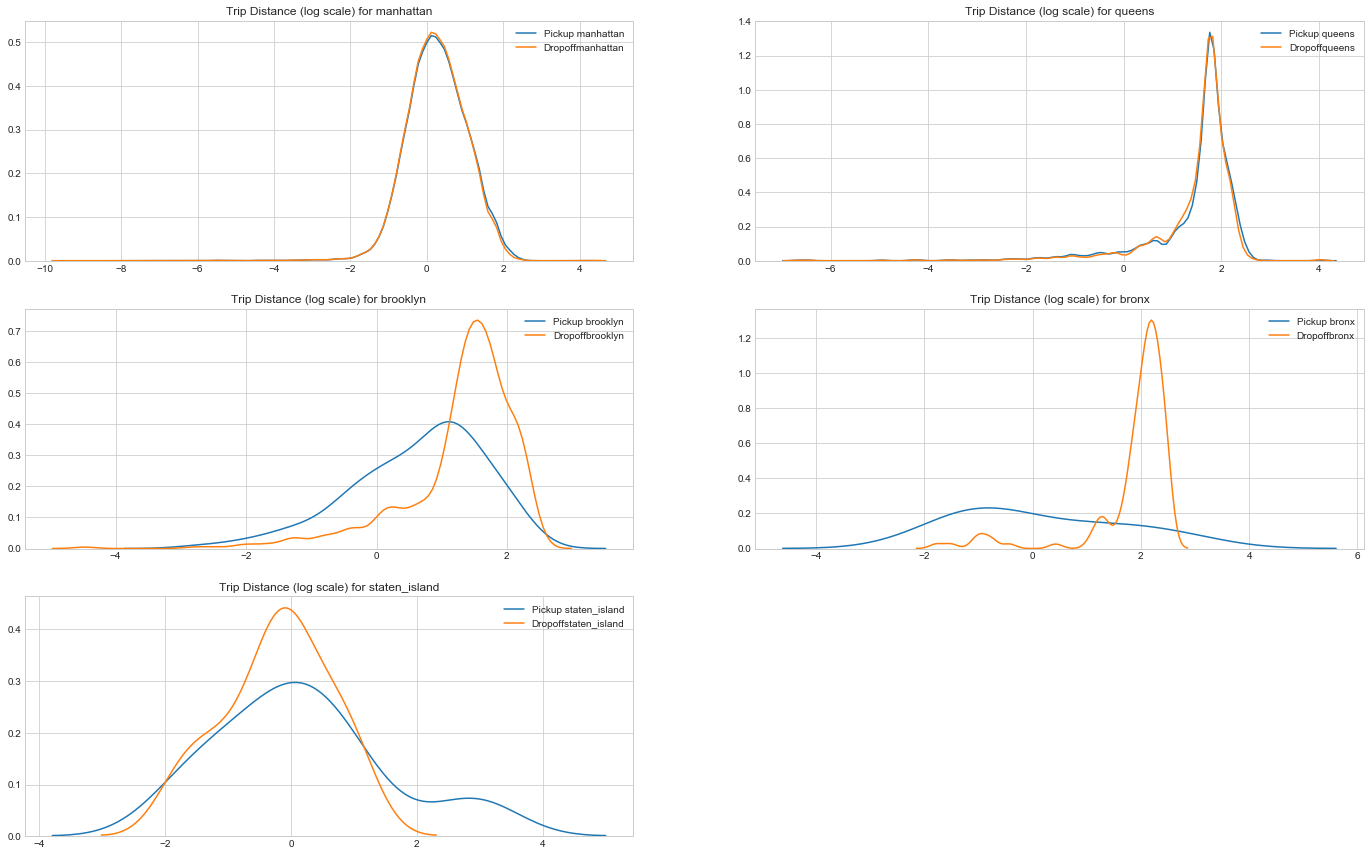

In [86]:
plt.figure(figsize=(24,15))
plt.title("Distribution of Trip Distances Across Buroughs")
i=1
for key in nyc_boroughs.keys():
    plt.subplot(3,2,i)
    sns.kdeplot(np.log(nyc.loc[nyc['pickup_borough']==key,'distance'].values),label='Pickup '+ key)
    sns.kdeplot(np.log(nyc.loc[nyc['dropoff_borough']==key,'distance'].values),label='Dropoff'+ key).set_title("Trip Distance (log scale) for "+key)
    i=i+1

Dropoffs to Bronx and Staten island are long trips. 

## Model Implementation

We will be implementing Multiple Linear Regression, Decision Trees, Random Forest and Boosted Trees.

Splitting the nyc data to train data as well as validation data

In [87]:
# Labels are the values we want to predict
labels = np.array(nyc['fare_amount'])

# Remove the labels from the nyc
# axis 1 refers to the columns
features= nyc.drop(['fare_amount','key', 'pickup_datetime','time','pickup_borough','dropoff_borough'],axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)


In [88]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_nyc, valid_nyc, train_labels, valid_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

# Looking at the shape of the training data and validation data
print('Training Features Shape:', train_nyc.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', valid_nyc.shape)
print('Testing Labels Shape:', valid_labels.shape)

Training Features Shape: (35479, 11)
Training Labels Shape: (35479,)
Testing Features Shape: (11827, 11)
Testing Labels Shape: (11827,)


### Multiple Linear Regression

In [89]:
# Importing the Linear Regression model from the sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lm = LinearRegression()
lm.fit(train_nyc,train_labels)
y_pred=np.round(lm.predict(valid_nyc),2)
lm_rmse=np.sqrt(mean_squared_error(y_pred, valid_labels))
lm_train_rmse=np.sqrt(mean_squared_error(lm.predict(train_nyc), train_labels))
lm_variance=abs(lm_train_rmse - lm_rmse)
print("Test RMSE for Linear Regression is ",lm_rmse)
print("Train RMSE for Linear Regression is ",lm_train_rmse)
print("Variance for Linear Regression is ",lm_variance)

Test RMSE for Linear Regression is  4.741170538190718
Train RMSE for Linear Regression is  4.609586611770675
Variance for Linear Regression is  0.1315839264200429


### Establishing Baseline

### Random Forest Regression

In [90]:
# Importing the Random Forest from scikit learn package 
from sklearn.ensemble import RandomForestRegressor
# Importing GridSearchCV which checks for the optimal n_estimator parameter
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

est = range(50,100,50)
params_to_test = {'n_estimators': est}


rf = RandomForestRegressor(random_state = 42)

grid_search = GridSearchCV(rf, param_grid=params_to_test, cv=10, scoring='neg_mean_squared_error')

grid_search.fit(train_nyc, train_labels)

best_model = grid_search.best_estimator_

In [93]:
# Use the forest's predict method on the test data
predictions = best_model.predict(valid_nyc)
# Calculate the absolute errors
errors = abs(predictions - valid_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 1.66 degrees.


In [94]:
rf_rmse=np.sqrt(mean_squared_error(predictions, valid_labels))
rf_train_rmse=np.sqrt(mean_squared_error(best_model.predict(train_nyc), train_labels))
rf_variance=abs(rf_train_rmse - rf_rmse)
print("Test RMSE for Random Forest Regression is ",rf_rmse)
print("Train RMSE for Random Forest Regression is ",rf_train_rmse)
print("Variance for Random Forest Regression is ",rf_variance)

Test RMSE for Random Forest Regression is  2.5948768942642024
Train RMSE for Random Forest Regression is  1.0026998156994043
Variance for Random Forest Regression is  1.5921770785647982


In [ ]:
scores = [x[1] for x in best_model.grid_scores_]
scores = np.array(scores).reshape(len(est), len(Gammas))

for ind, i in enumerate(Cs):
    plt.plot(Gammas, scores[ind], label='C: ' + str(i))
plt.legend()
plt.xlabel('Gamma')
plt.ylabel('Mean score')
plt.show()


### Gradient Boosting Regression 

In [95]:
from sklearn.ensemble import GradientBoostingRegressor

est = range(50,100,50)
params_to_test = {'n_estimators': est}

gb = GradientBoostingRegressor(learning_rate=1, max_depth=3, random_state = 1)

grid_search_gb = GridSearchCV(gb, param_grid=params_to_test, cv=10, scoring='neg_mean_squared_error')

grid_search_gb.fit(train_nyc,train_labels)

best_model_gb = grid_search_gb.best_estimator_

In [96]:
gb_rmse=np.sqrt(mean_squared_error(predictions, valid_labels))
gb_train_rmse=np.sqrt(mean_squared_error(best_model.predict(train_nyc), train_labels))
gb_variance=abs(gb_train_rmse - gb_rmse)
print("Test RMSE for Random Forest Regression is ",gb_rmse)
print("Train RMSE for Random Forest Regression is ",gb_train_rmse)
print("Variance for Random Forest Regression is ",gb_variance)

Test RMSE for Random Forest Regression is  2.5948768942642024
Train RMSE for Random Forest Regression is  1.0026998156994043
Variance for Random Forest Regression is  1.5921770785647982


## Performance Metrics

In [97]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / valid_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 82.07 %.
